<a href="https://colab.research.google.com/github/tetiana-martynenko/Python-For-DS/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.5 MB/s eta 0:00:00


In [49]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [50]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [51]:
cursor = con.cursor()

In [52]:
sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees
"""

In [53]:
cursor.execute(sql)


In [54]:
cursor.fetchall()


[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [101]:
sql2 = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM employees.salaries s
where (s.emp_no, s.to_date) in (
SELECT emp_no, max(to_date)
from employees.salaries
group by emp_no )
"""

In [102]:
cursor.execute(sql2)

In [103]:
field_names = [i[0] for i in cursor.description]

In [104]:
import pandas as pd

In [105]:
res = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [106]:
display(res.columns)
display(res.shape)
display(res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [ ]:
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])


Tables in the database:
current_dept_emp
departments
dept_emp
dept_emp_latest_date
dept_manager
employees
salaries
titles


In [ ]:
table_name = "salaries"
cursor.execute(f"SHOW COLUMNS FROM {table_name};")
columns = cursor.fetchall()
print(f"Columns in {table_name}:")
for column in columns:
    print(column[0])


Columns in salaries:
emp_no
salary
from_date
to_date


In [ ]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

[link text](https://)5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [107]:
res.to_date.dtype

dtype('O')

In [109]:
res['to_date'] = res['to_date'].astype('str')

In [110]:
equal_999 = (res['to_date'] == '9999-01-01').sum()
not_equal_999 = (res['to_date'] != '9999-01-01').sum()
print(equal_999, not_equal_999)

240124 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [111]:
import matplotlib.pyplot as plt


In [118]:
work_now = res[res['to_date'] == '9999-01-01'].groupby('emp_no')['salary'].sum()

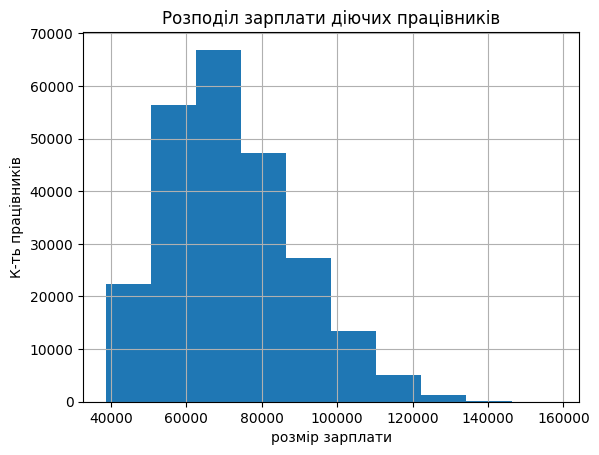

In [121]:
plt.hist(work_now)
plt.title('Розподіл зарплати діючих працівників')
plt.xlabel('розмір зарплати')
plt.ylabel('К-ть працівників')
plt.grid();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [122]:
con.close()